In [163]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Heat capacity of dry air ($C_p$) is $1.005$ kJ/kg$^{\circ}$C

Heat capacity of water vapor ($C_h$) is $1.82$ kJ/kg$^{\circ}$C

$H$ is absolute humidity in kg water vapor per kg dry air in the mixture

Therfore $C_h * H$ - heat capacity of humid air

In [159]:
R_univ = 8.314 #J/mol*K, universal gas constant
R_v    = 4.615 #J/mol*K, water vapor gas constant
M_gas  = 28.9647 #Molar weight of air

def calc_speed_of_sound(R_univ, R_v, M_gas, t, H_rel):
    R = R_univ/M_gas #specific gas constant
    T = t+273.15 #K, Temperature

    e_w = 610.78 * np.exp(t/(t+238.3 )*17.2694)/100 #Saturated vapor pressure Reference: Tetens, O., 1930
    e = e_w*(H_rel/100) #vapor pressure

    H = e/(R_v*T) #absolute humidity

    cp = 1.005 - 1.82*H #Heat capacity of humid air (constnat Pressure)
    cv = cp-R           #Heat capacity of humid air (constnat Volume)
    gamma = cp/cv #Ratio of specific heats
    return np.sqrt(gamma*(R/10)*T) #Speed of sound

calc_speed_of_sound(R_univ, R_v, M_gas, 30, 0)*100

349.00520052923412

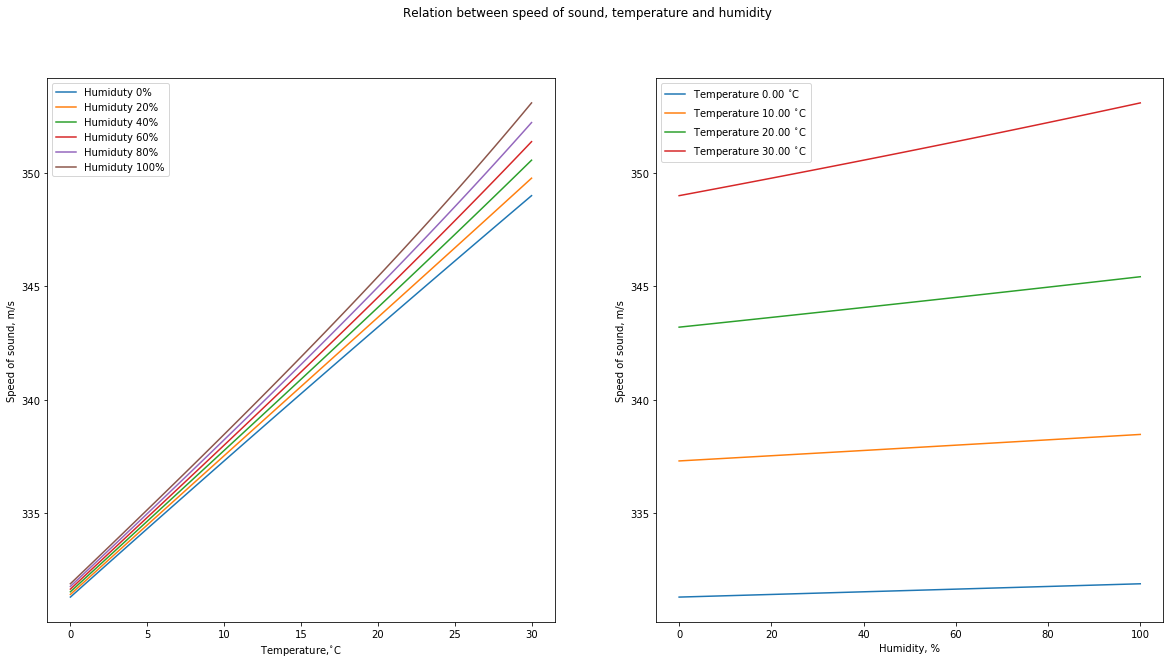

In [162]:
t = np.linspace(0,30)

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)
for H_rel in np.arange(0,120,20):
    c_t = calc_speed_of_sound(R_univ, R_v, M_gas, t, H_rel)
    ax1.plot(t, c_t*100, label='Humiduty {}%'.format(H_rel))
ax1.legend()
ax1.set_xlabel('Temperature,$^{\circ}$C')
ax1.set_ylabel('Speed of sound, m/s')

ax2 = plt.subplot(122)
H_rel = np.linspace(0,100)
for temp in np.arange(0,40,10):
    c_H = calc_speed_of_sound(R_univ, R_v, M_gas, temp, H_rel)
    ax2.plot(H_rel, c_H*100, label='Temperature %.2f $^{\circ}$C'% (temp))
ax2.legend()
ax2.set_xlabel('Humidity, %')
ax2.set_ylabel('Speed of sound, m/s')
plt.suptitle('Relation between speed of sound, temperature and humidity')
plt.savefig('Speed_of_sound_variations.pdf')